In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
gld = yf.download('GLD', start='2020-01-01')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

[*********************100%***********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2020-01-02,1,143.860001,144.210007,143.399994,143.949997
2020-01-03,2,145.750000,146.320007,145.399994,145.860001
2020-01-06,3,148.440002,148.479996,146.949997,147.389999
2020-01-07,4,147.570007,148.139999,147.429993,147.970001
2020-01-08,5,148.490005,148.610001,146.139999,146.860001


In [6]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1169 entries, 2020-01-02 to 2024-08-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1169 non-null   int64  
 1   Open    1169 non-null   float64
 2   High    1169 non-null   float64
 3   Low     1169 non-null   float64
 4   Close   1169 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 54.8 KB


In [8]:
gld = gld.copy()
gld.loc[:, '9-day'] = gld['Close'].rolling(9).mean()
gld.loc[:, '21-day'] = gld['Close'].rolling(21).mean()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2020-01-30,20,148.690002,149.309998,148.009995,148.470001,147.643334,NaN
2020-01-31,21,148.880005,149.679993,148.809998,149.330002,147.948890,147.021429
2020-02-03,22,148.660004,148.779999,147.679993,148.360001,148.128889,147.231429
2020-02-04,23,146.970001,147.029999,145.800003,146.429993,148.088889,147.258572
2020-02-05,24,146.380005,146.809998,146.160004,146.610001,148.032223,147.221429
2020-02-06,25,147.279999,147.630005,147.000000,147.399994,147.967779,147.194286


In [9]:
gld.loc[:, 'signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld.loc[:, 'signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld = gld.dropna()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2020-01-31,21,148.880005,149.679993,148.809998,149.330002,147.948890,147.021429,1
2020-02-03,22,148.660004,148.779999,147.679993,148.360001,148.128889,147.231429,1
2020-02-04,23,146.970001,147.029999,145.800003,146.429993,148.088889,147.258572,1
2020-02-05,24,146.380005,146.809998,146.160004,146.610001,148.032223,147.221429,1
2020-02-06,25,147.279999,147.630005,147.000000,147.399994,147.967779,147.194286,1


In [10]:
gld.loc[:, 'return'] = np.log(gld['Close']).diff()
gld.loc[:, 'system_return'] = gld['signal'] * gld['return']
gld.loc[:, 'entry'] = gld['signal'].diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-01-31,21,148.880005,149.679993,148.809998,149.330002,147.948890,147.021429,1,NaN,NaN,NaN
2020-02-03,22,148.660004,148.779999,147.679993,148.360001,148.128889,147.231429,1,-0.006517,-0.006517,0.0
2020-02-04,23,146.970001,147.029999,145.800003,146.429993,148.088889,147.258572,1,-0.013094,-0.013094,0.0
2020-02-05,24,146.380005,146.809998,146.160004,146.610001,148.032223,147.221429,1,0.001229,0.001229,0.0
2020-02-06,25,147.279999,147.630005,147.000000,147.399994,147.967779,147.194286,1,0.005374,0.005374,0.0


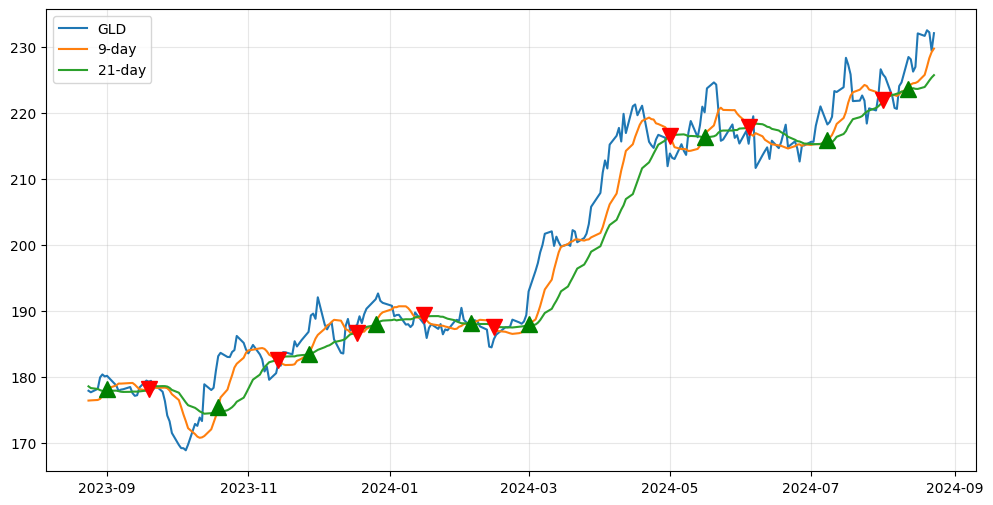

In [21]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

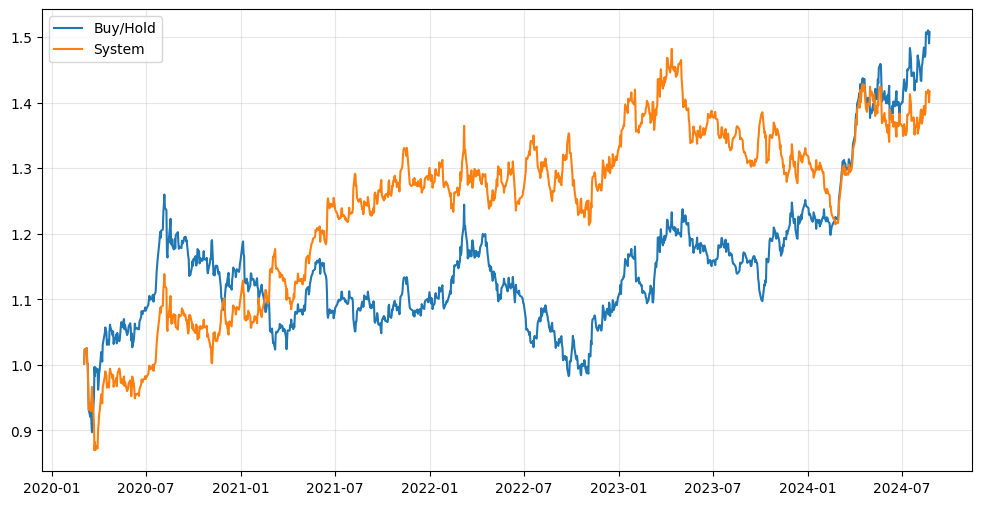

In [30]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [11]:
overall_return = np.exp(gld['return']).cumprod().iloc[-1] - 1
overall_return

np.float64(0.5537400483993742)

In [12]:
systematic_return = np.exp(gld['system_return']).cumprod().iloc[-1] -1
systematic_return

np.float64(0.4481588351486556)